<a href="https://colab.research.google.com/github/Ujjawalp/Tomato-Leaf-Disease-Detection/blob/main/Tomato_leaf_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle_api_credentials/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download ashishmotwani/tomato

 99% 1.35G/1.37G [00:16<00:00, 91.9MB/s]
100% 1.37G/1.37G [00:16<00:00, 89.1MB/s]


In [ ]:
! unzip tomato.zip

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications import InceptionV3

In [ ]:
inc = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
train_datagen = ImageDataGenerator(zoom_range= 0.5, shear_range= 0.3, horizontal_flip= True, preprocessing_function= )

val_datagen = ImageDataGenerator(preprocessing_function= )

SyntaxError: invalid syntax (<ipython-input-15-85afc9b06462>, line 1)

In [ ]:
train = train_datagen.flow_from_directory(directory= "/content/tomato/train", target_size= (256,256), batch_size= 32)

val = val_datagen.flow_from_directory(directory= "/content/tomato/val", target_size= (256,256), batch_size= 32)

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top= False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)

X = Dense(units= 10, activation='softmax')(X)

model = Model(base_model.input, X)

In [ ]:
model.summary()


In [ ]:
model.compile(optimizer= 'adam', loss= keras.losses.categorical_crossentropy, metrics= ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 5, verbose= 2)

mc = ModelCheckpoint(filepath= 'best_model.h5', monitor= 'val_accuracy', min_delta= 0.01, patience= 5, verbose= 2, save_best_only= True)

cb = [es, mc]

In [ ]:
his = model.fit_generator(train, steps_per_epoch= 16, epochs= 50, verbose= 2, callbacks= cb, validation_data= val, validation_steps=16)

<ipython-input-19-41f3b8bc3a68>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train, steps_per_epoch= 16, epochs= 50, verbose= 2, callbacks= cb, validation_data= val, validation_steps=16)


Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.49219, saving model to best_model.h5
16/16 - 24s - loss: 16.5962 - accuracy: 0.3047 - val_loss: 12.4549 - val_accuracy: 0.4922 - 24s/epoch - 2s/step
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.49219 to 0.61328, saving model to best_model.h5
16/16 - 14s - loss: 8.6584 - accuracy: 0.5586 - val_loss: 9.0026 - val_accuracy: 0.6133 - 14s/epoch - 896ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.61328 to 0.63477, saving model to best_model.h5
16/16 - 15s - loss: 7.6637 - accuracy: 0.6543 - val_loss: 9.1740 - val_accuracy: 0.6348 - 15s/epoch - 912ms/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.63477 to 0.68164, saving model to best_model.h5
16/16 - 12s - loss: 5.6371 - accuracy: 0.7031 - val_loss: 8.2308 - val_accuracy: 0.6816 - 12s/epoch - 737ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.68164 to 0.73242, saving model to best_model.h5
16/16 - 14s - loss: 6.3031 - accuracy: 0.6680 - val_loss: 6.2508 - val_accuracy: 0.7324 - 14s/epoch - 904ms/step
Epoch 6/50

Epoch 6: val_accuracy did not improve from 0.73242
16/16 - 11s - loss: 4.6452 - accuracy: 0.7539 - val_loss: 7.5200 - val_accuracy: 0.7246 - 11s/epoch - 70

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

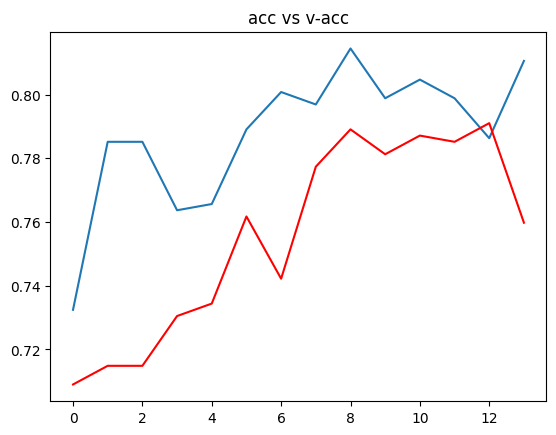

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= "red")
plt.title("acc vs v-acc")
plt.show()

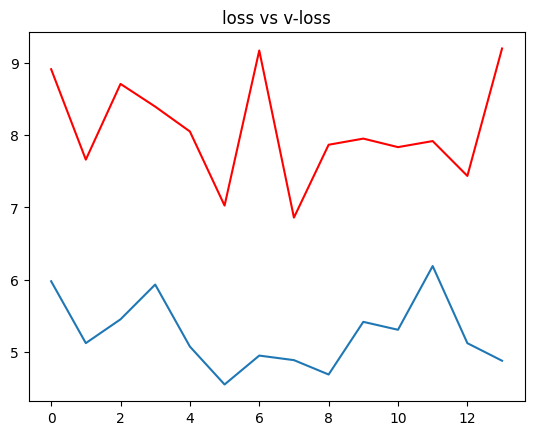

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c= "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
from keras.models import  load_model

model = load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate_generator(val)[1]

print(f"The accuracy of your model is = {acc*100} %")

<ipython-input-52-3dd475e0eb34>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


The accuracy of your model is = 79.29999828338623 %


In [ ]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [ ]:
def prediction(path):
  img = load_img(path, target_size=(256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis= 0)
  pred = np.argmax(model.predict(img))
  print(f" the image belongs to { ref[pred]}")

In [ ]:
path = "/content/test/bacterial_spot_tomato.jpg"

prediction(path)

1/1 [==============================] - 0s 30ms/step
 the image belongs to Tomato___Septoria_leaf_spot
